In [1]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.1 MB/s eta 0:00:00


In [3]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.3', 'qiskit': '0.44.3', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.45.0-py3-none-any.whl size=313107 sha256=a23af18c374ee55a09d244c59ab1a88e5567

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [7]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="463bc61b55d82149a7ec719c9e89eeb8bc80a916eac5331f2d98fc35be2b4650af627d457593b0050910aa0bd4a0f1e3a8361ff25874d214f01640e55e571d27")

In [8]:
from qiskit.test.reference_circuits import ReferenceCircuits
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

In [9]:
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")
job = Sampler(backend).run(ReferenceCircuits.bell())
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cksnpl0q8psj90svs2f0
SamplerResult(quasi_dists=[{0: 0.49725, 3: 0.50275}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


# Testando com a CHSH

In [10]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [11]:
# Add your token below
service = QiskitRuntimeService(channel="ibm_quantum")
# Select the system with the fewest number of jobs in the queue
backend = service.least_busy(simulator=False, operational=True)

# Initialize your session
session = Session(backend=backend)
backend.name

'ibm_nairobi'

In [22]:
theta = Parameter("$\\theta$")

chsh_circuit_no_meas = QuantumCircuit(2)
chsh_circuit_no_meas.h(0)
chsh_circuit_no_meas.cx(0, 1)
chsh_circuit_no_meas.ry(theta, 0)
chsh_circuit_no_meas.draw()

┌───┐     ┌──────────────┐
q_0: ┤ H ├──■──┤ Ry($\theta$) ├
     └───┘┌─┴─┐└──────────────┘
q_1: ─────┤ X ├────────────────
          └───┘

In [23]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

In [24]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])
ZX = SparsePauliOp.from_list([("ZX", 1)])
XZ = SparsePauliOp.from_list([("XZ", 1)])
XX = SparsePauliOp.from_list([("XX", 1)])

ops = [ZZ, ZX, XZ, XX]
num_ops = len(ops)

In [25]:
batch_circuits = [chsh_circuit_no_meas] * number_of_phases * num_ops
batch_ops = [op for op in ops for _ in individual_phases]

In [26]:
estimator = Estimator(session=session)

batch_expvals = (
    estimator.run(
        batch_circuits, batch_ops, parameter_values=individual_phases * num_ops, shots=int(1e4)
    )
    .result()
    .values
)

In [27]:
ZZ_expval, ZX_expval, XZ_expval, XX_expval = [
    batch_expvals[kk * number_of_phases : (kk + 1) * number_of_phases] for kk in range(num_ops)
]

In [28]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab>
chsh1_est = ZZ_expval - ZX_expval + XZ_expval + XX_expval

# <CHSH2> = <AB> + <Ab> - <aB> + <ab>
chsh2_est = ZZ_expval + ZX_expval - XZ_expval + XX_expval

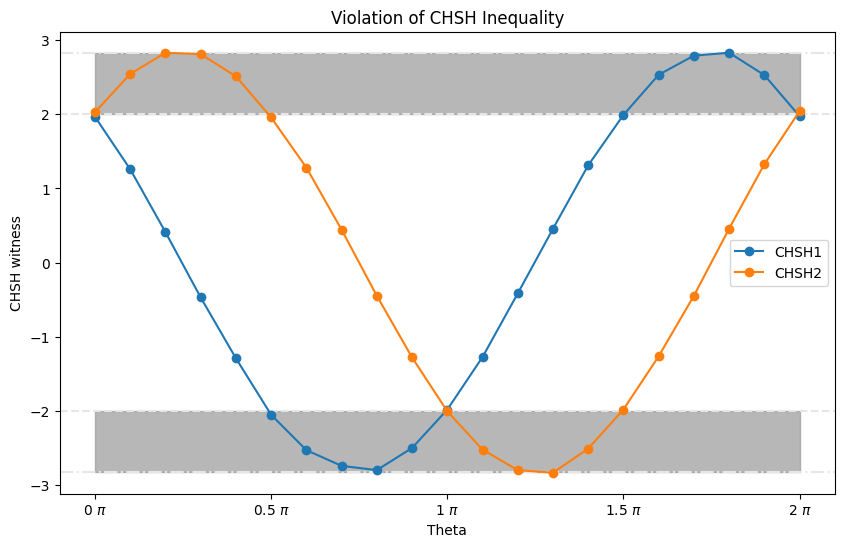

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
# results from hardware
ax.plot(phases / np.pi, chsh1_est, "o-", label="CHSH1", zorder=3)
ax.plot(phases / np.pi, chsh2_est, "o-", label="CHSH2", zorder=3)
# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title(f"Violation of CHSH Inequality")
plt.xlabel("Theta")
plt.ylabel("CHSH witness")
plt.legend()